# Plot conformal space as a scatter plot

In [1]:
import pandas as pd
import pathlib as pal
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D

In [2]:
root_p = pal.Path('/home/neuromod/ASD_high_risk_endophenotype_code_supplement/20190524_Validation_Data/')
model1_p = root_p / 'validation_net_split_1_model_1_combined_p_values.tsv'
pheno_valid_p = root_p / 'ABIDE_2_Pheno_PSM_matched_ados.tsv'

figure_p = pal.Path('/home/neuromod/ASD_high_risk_endophenotype_code_supplement/Figures')
if not figure_p.is_dir():
    figure_p.mkdir(parents=True)

## Load and preparation

In [3]:
pheno_valid = pd.read_csv(pheno_valid_p, sep='\t')
model1 = pd.read_csv(model1_p, sep='\t')
model1.rename(columns={'V1': 'p_ASD', 'V2': 'p_TDC'}, inplace=True)

In [4]:
pheno_valid.loc[:, 'is_hps'] = ((model1.p_ASD>0.2) & (model1.p_TDC<=0.2)).values
pheno_valid.loc[:, 'p_ASD'] = model1.loc[:, 'p_ASD'].values
pheno_valid.loc[:, 'p_TDC'] = model1.loc[:, 'p_TDC'].values

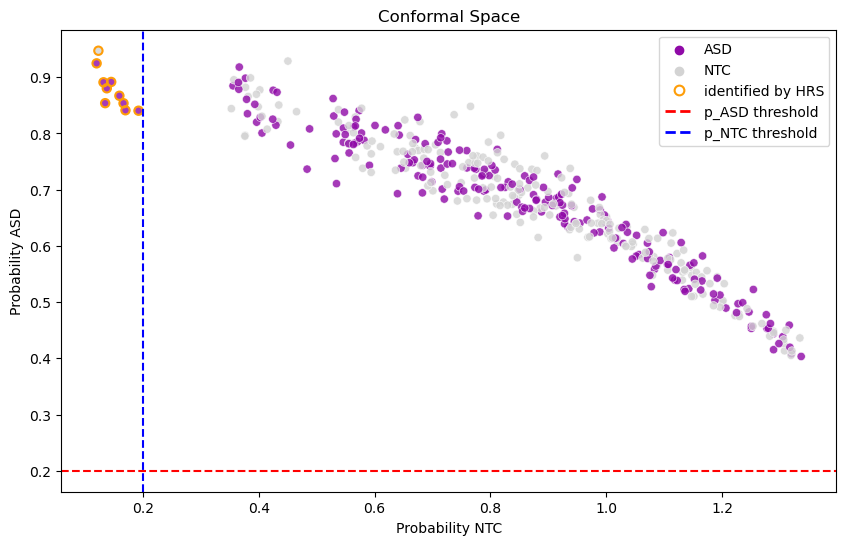

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='p_TDC', y='p_ASD', hue='DX_GROUP', data=pheno_valid, 
                          palette=['#8F09A7', 'lightgrey'], alpha=0.8)
rings = sns.scatterplot(x='p_TDC', y='p_ASD', style='is_hps', markers=['o'], data=pheno_valid[pheno_valid['is_hps']], 
                         color='k', edgecolor='#FE9D08', facecolors='none', linewidth=1.5)

# Add lines for thresholds
hline = plt.axhline(y=0.2, color='r', linestyle='--')
vline = plt.axvline(x=0.2, color='b', linestyle='--')

# Custom legend handles for threshold lines and HRS ring
legend_lines = [Line2D([0], [0], marker='o', color='none', markerfacecolor='none', 
                       markeredgecolor='#FE9D08', markersize=7, markeredgewidth=1.5),
                Line2D([0], [0], color='r', linestyle='--', lw=2),
                Line2D([0], [0], color='b', linestyle='--', lw=2)]

# Custom legend labels
legend_labels = ['identified by HRS', 'p_ASD threshold', 'p_NTC threshold']

# Retrieve the handles and labels from the scatter plot
handles, labels = scatter.get_legend_handles_labels()

# Update labels for DX_GROUP
new_labels = ['ASD' if label == 'Autism' else 'NTC' for label in labels]

# Construct the legend
plt.legend(handles=handles[:-1] + legend_lines, labels=new_labels[:-1] + legend_labels)

plt.title('Conformal Space')
plt.xlabel('Probability NTC')
plt.ylabel('Probability ASD')

scatter.figure.savefig('/home/neuromod/ASD_high_risk_endophenotype_code_supplement/Figures/conformal_space.png',dpi=300)

plt.show()